In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np

def plot_log(log_path):
    # read log into dictinary
    dic = {'test_loss':[], 'test_acc1':[], 'test_acc5':[]}
    with open(log_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            dic_line = json.loads(line[:-1])
            for idx in dic:
                dic[idx] += [dic_line[idx]]
    
    # plot log
    loss = np.min(dic['test_loss'])
    loss_str = f'{loss:.2f}'
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4), dpi=200)
    ax1.set(xlabel='# epochs', ylabel = 'loss')
    ax1.plot(dic['test_loss'], label='test_loss')
    ax1.axhline(y=loss, color='k', linestyle='--', linewidth=0.6)
    ax1.annotate(loss_str,xy=(0,loss+0.05))
    ax1.grid(linestyle=':')
    ax1.legend()
    
    acc1, acc5 = np.max(dic['test_acc1']), np.max(dic['test_acc5'])
    acc1_str, acc5_str = f'{acc1:.2f}', f'{acc5:.2f}'
    ax2.set(ylim=(0, 100), xlabel='# epochs', ylabel = "Acc./%")
    ax2.plot(dic['test_acc1'], label = 'test_acc@1', c='r')
    ax2.plot(dic['test_acc5'], label = 'test_acc@5', c='g')
    ax2.axhline(y=acc1, color='k', linestyle='--', linewidth=0.6)
    ax2.axhline(y=acc5, color='k', linestyle='--', linewidth=0.6)
    ax2.annotate(acc1_str,xy=(0,acc1+1))
    ax2.annotate(acc5_str,xy=(0,acc5+1))
    ax2.grid(linestyle=':')
    ax2.legend()
    plt.show()

In [2]:
transfer_deit_tiny_cifar10_path = './logs/transfer_deit_tiny_cifar10_log.txt'
transfer_deit_tiny_cifar100_path = './logs/transfer_deit_tiny_cifar100_log.txt'

transfer_deit_small_cifar10_path = './logs/transfer_deit_small_cifar10_log.txt'
transfer_deit_small_cifar100_path = './logs/transfer_deit_small_cifar100_log.txt'

transfer_deit_base_cifar10_path = './logs/transfer_deit_base_cifar10_log.txt'
transfer_deit_base_cifar100_path = './logs/transfer_deit_base_cifar100_log.txt'

transfer_swin_tiny_cifar10_path = './logs/transfer_swin_tiny_cifar10_log.txt'
transfer_swin_tiny_cifar100_path = './logs/transfer_swin_tiny_cifar100_log.txt'

transfer_swin_small_cifar10_path = './logs/transfer_swin_small_cifar10_log.txt'
transfer_swin_small_cifar100_path = './logs/transfer_swin_small_cifar100_log.txt'

transfer_swin_base_cifar10_path = './logs/transfer_swin_base_cifar10_log.txt'
transfer_swin_base_cifar100_path = './logs/transfer_swin_base_cifar100_log.txt'

In [3]:
trasnfer_deit_cifar10_paths = [transfer_deit_tiny_cifar10_path, 
                               transfer_deit_small_cifar10_path, 
                               transfer_deit_base_cifar10_path]

trasnfer_deit_cifar100_paths = [transfer_deit_tiny_cifar100_path, 
                                transfer_deit_small_cifar100_path, 
                                transfer_deit_base_cifar100_path]

trasnfer_swin_cifar10_paths = [transfer_swin_tiny_cifar10_path,
                               transfer_swin_small_cifar10_path,
                               transfer_swin_base_cifar10_path]

trasnfer_swin_cifar100_paths = [transfer_swin_tiny_cifar100_path,
                                transfer_swin_small_cifar100_path,
                                transfer_swin_base_cifar100_path]

deit_names = ['deit-tiny', 'deit-small', 'deit-base']
swin_names = ['swin-tiny', 'swin-small', 'swin-base']

In [3]:
def read_log(log_path):
    dic = {'test_loss':[], 'test_acc1':[], 'test_acc5':[]}
    with open(log_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            dic_line = json.loads(line[:-1])
            for idx in dic:
                dic[idx] += [dic_line[idx]]
    
    return dic

In [5]:
def plot_acc1(paths, mode_names):
    # read log into dictinary
    fig, ax = plt.subplots(figsize=(3,3), dpi=200)
    colors = ['g', 'b', 'r']
    for i in range(len(paths)):
        dic = read_log(paths[i])
        acc1 = np.max(dic['test_acc1'])
        acc1_str= f'{acc1:.2f}%'
        
        ax.set(xlim=(1,50), ylim=(0, 100), xlabel='# epochs', ylabel = "Acc@1./%")
        ax.plot(range(1,51), dic['test_acc1'], label = mode_names[i], c=colors[i])
        ax.axhline(y=acc1, color='k', linestyle='--', linewidth=0.6)
        offsets = [-2, 1, 2]
        ax.text(-6+8*i, acc1+offsets[i], acc1_str, size=8, c=colors[i])
    
    ax.grid(linestyle=':')
    ax.legend(loc=4)
    plt.show()

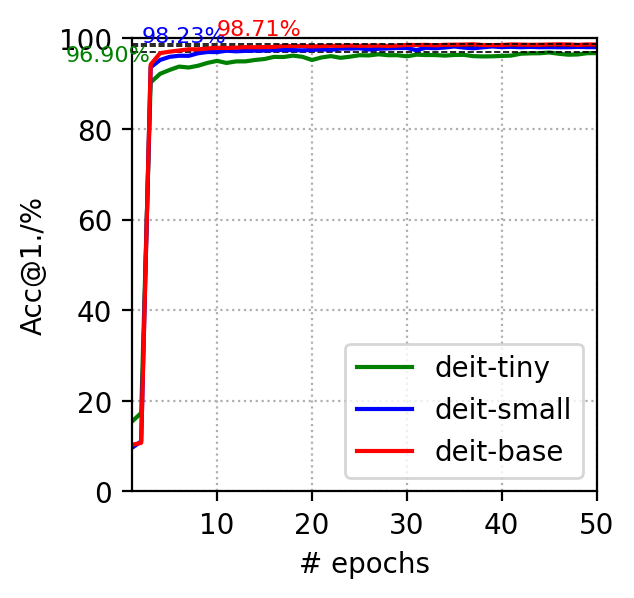

In [6]:
plot_acc1(trasnfer_deit_cifar10_paths, deit_names)

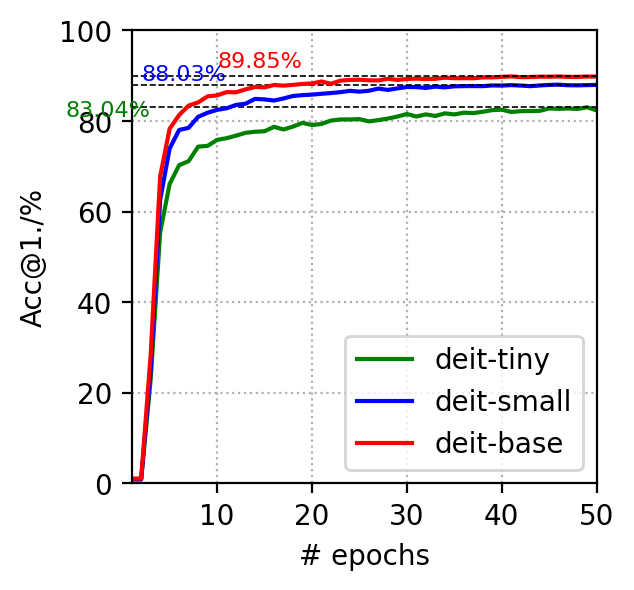

In [7]:
plot_acc1(trasnfer_deit_cifar100_paths, deit_names)

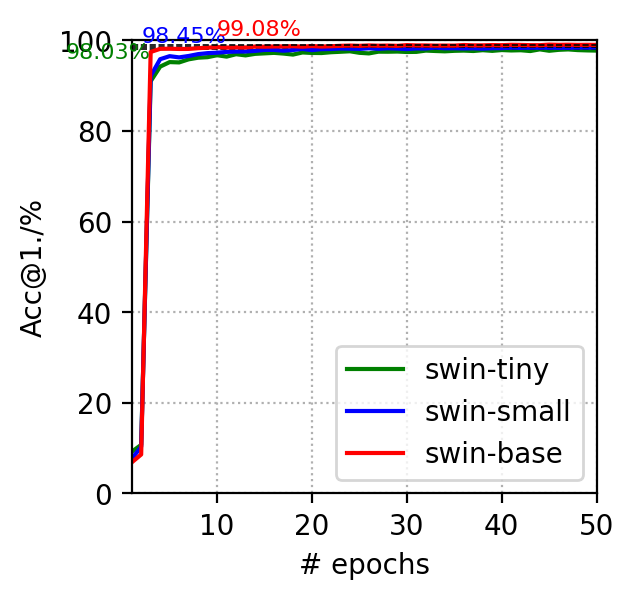

In [8]:
plot_acc1(trasnfer_swin_cifar10_paths, swin_names)

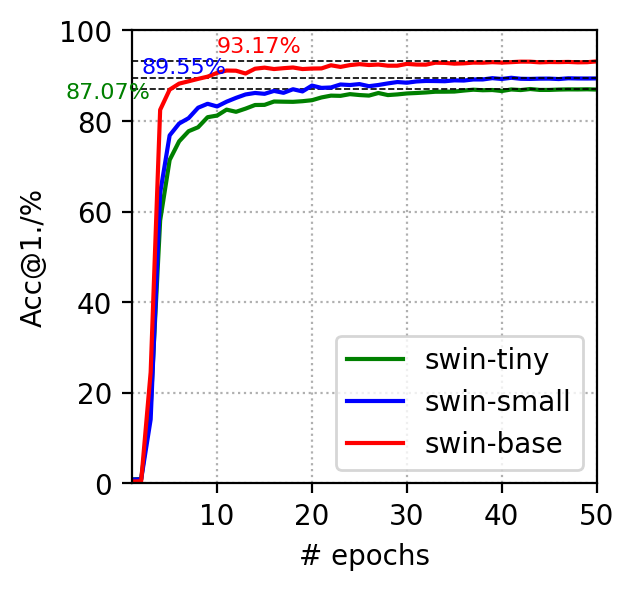

In [9]:
plot_acc1(trasnfer_swin_cifar100_paths, swin_names)

In [10]:
def plot_acc5(paths, mode_names):
    # read log into dictinary
    fig, ax = plt.subplots(figsize=(3,3), dpi=200)
    colors = ['g', 'b', 'r']
    for i in range(len(paths)):
        dic = read_log(paths[i])
        acc5 = np.max(dic['test_acc5'])
        acc5_str= f'{acc5:.2f}%'
        
        ax.set(xlim=(1,50), ylim=(0, 100), xlabel='# epochs', ylabel = "Acc@5./%")
        ax.plot(range(1,51), dic['test_acc5'], label = mode_names[i], c=colors[i])
        ax.axhline(y=acc5, color='k', linestyle='--', linewidth=0.6)
        offsets = [-3, 1, 2]
        ax.text(-6+8*i, acc5+offsets[i], acc5_str, size=8, c=colors[i])
    
    ax.grid(linestyle=':')
    ax.legend(loc=4)
    plt.show()

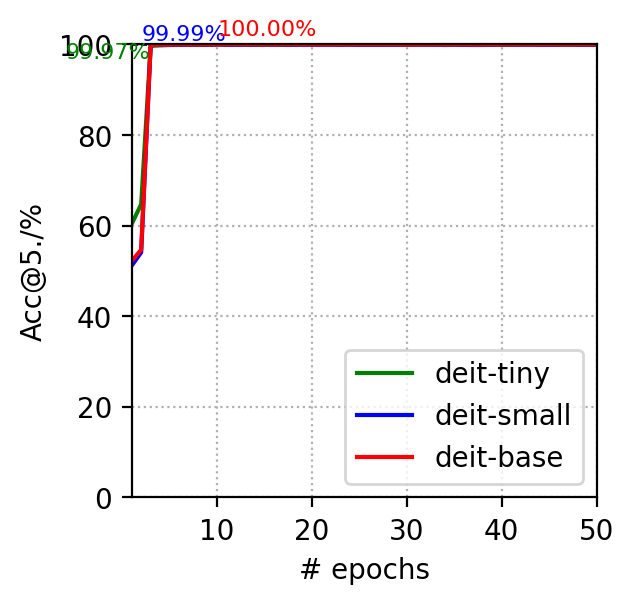

In [11]:
plot_acc5(trasnfer_deit_cifar10_paths, deit_names)

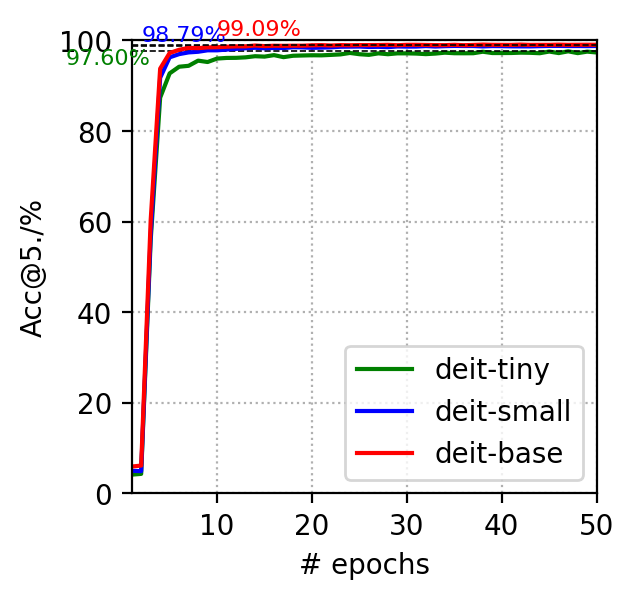

In [12]:
plot_acc5(trasnfer_deit_cifar100_paths, deit_names)

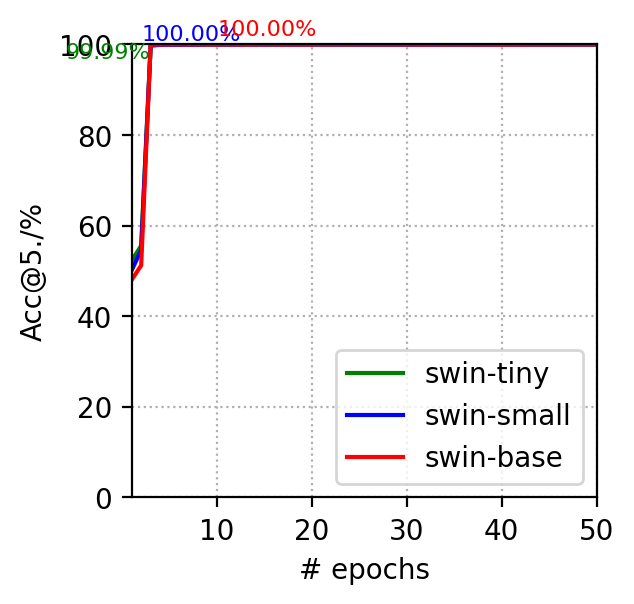

In [13]:
plot_acc5(trasnfer_swin_cifar10_paths, swin_names)

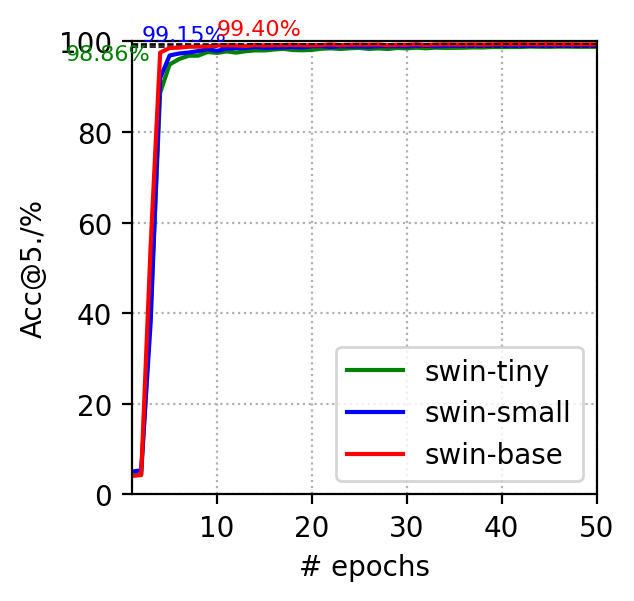

In [14]:
plot_acc5(trasnfer_swin_cifar100_paths, swin_names)

In [15]:
deit_speed = [760.9, 282.1, 87.7]
swin_speed = [226.6, 131.1, 83.4]
vit_speed = 25.8

In [16]:
path_1 = [trasnfer_deit_cifar10_paths, trasnfer_swin_cifar10_paths]
acc_1 = [[96.90, 98.23, 98.71], [98.03, 98.45, 99.08]]
acc_2 = [[83.04,88.03,89.85],[87.07,89.55,93.17]]
speed_1 = [deit_speed, swin_speed]
names_1 = [deit_names, swin_names]

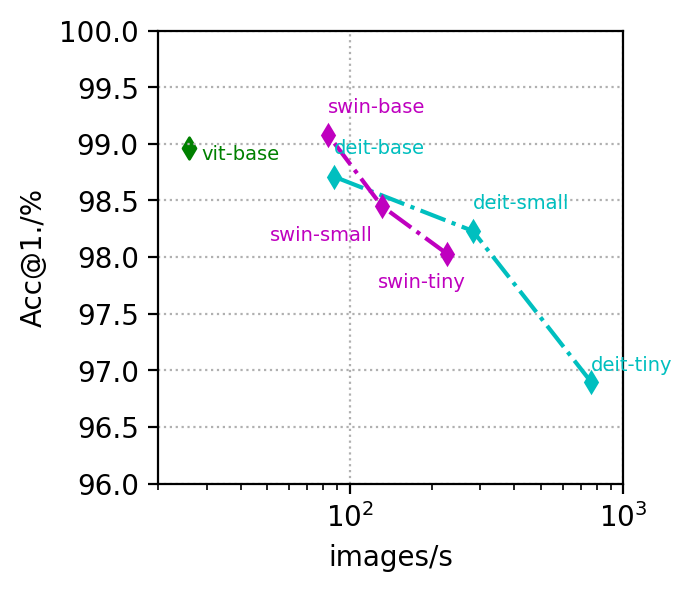

In [17]:
def plot_acc1_cifar10(paths, speeds, model_names):
    # read log into dictinary
    fig, ax = plt.subplots(figsize=(3,3), dpi=200)
    colors = ['c', 'm', 'r']
    marker = ['D', 'D']
    offsets = [[(0,0.1),(0,0.2),(0,0.2)], [(-100,-0.3), (-80,-0.3), (0,0.2)]]
    ax.set_xscale('log')
    ax.set(xlim=(20, 1000), ylim=(96, 100), xlabel='images/s', ylabel = "Acc@1./%")
    
    for i in range(len(paths)):
        acc1=[]
        for j in range(len(paths[i])):
            dic = read_log(paths[i][j])
            acc1 += [np.max(dic['test_acc1'])]
            ax.text(speeds[i][j]+offsets[i][j][0], acc1[j]+offsets[i][j][1], model_names[i][j], size=7, c=colors[i])
            
        ax.plot(speeds[i], acc1, label = model_names[i][j], c=colors[i], marker='d', markersize=5, linestyle='-.')
            
            
            
    ax.scatter(25.8, 98.96, label = 'vit-base', c='g', marker='d', s=30)
    ax.text(25.8+3, 98.96-0.1, 'vit-base', size=7, c='g')
    ax.grid(linestyle=':')
    plt.show()

plot_acc1_cifar10(path_1, speed_1, names_1)

In [18]:
path_2 = [trasnfer_deit_cifar100_paths, trasnfer_swin_cifar100_paths]
speed_2 = [deit_speed, swin_speed]
names_2 = [deit_names, swin_names]

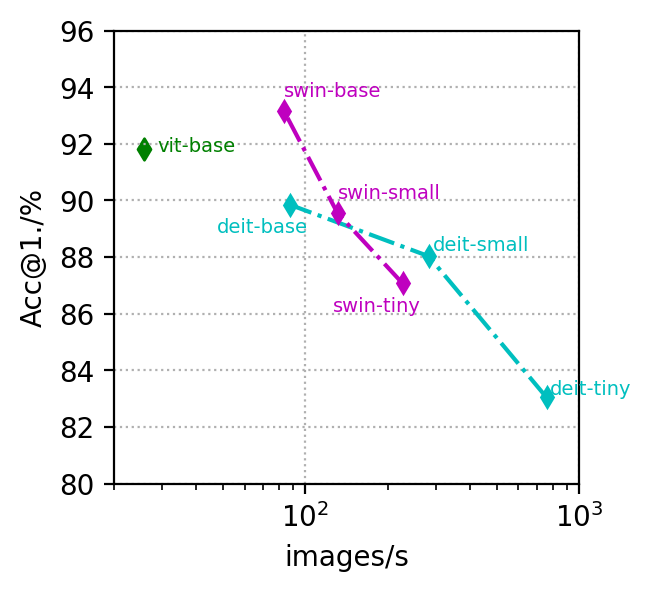

In [19]:
def plot_acc1_cifar100(paths, speeds, model_names):
    # read log into dictinary
    fig, ax = plt.subplots(figsize=(3,3), dpi=200)
    colors = ['c', 'm', 'r']
    marker = ['D', 'D']
    offsets = [[(20,0.1),(10,0.2),(-40,-1)], [(-100,-1), (0,0.5), (0,0.5)]]
    ax.set_xscale('log')
    ax.set(xlim=(20, 1000), ylim=(80, 96), xlabel='images/s', ylabel = "Acc@1./%")
    
    for i in range(len(paths)):
        acc1=[]
        for j in range(len(paths[i])):
            dic = read_log(paths[i][j])
            acc1 += [np.max(dic['test_acc1'])]
            ax.text(speeds[i][j]+offsets[i][j][0], acc1[j]+offsets[i][j][1], model_names[i][j], size=7, c=colors[i])
            
        ax.plot(speeds[i], acc1, label = model_names[i][j], c=colors[i], marker='d', markersize=5, linestyle='-.')  
            
    ax.scatter(25.8, 91.82, label = 'vit-base', c='g', marker='d', s=30)
    ax.text(25.8+3, 91.82-0.1, 'vit-base', size=7, c='g')
    ax.grid(linestyle=':')
    plt.show()

plot_acc1_cifar100(path_2, speed_2, names_2)

In [20]:
pretrain_deit_tiny_cifar100_path = './logs/pretrain_deit_tiny_cifar100_log.txt'
pretrain_deit_small_cifar100_path = './logs/pretrain_deit_small_cifar100_log.txt'
# read log into dictinary
dic1 = read_log(pretrain_deit_tiny_cifar100_path)
dic2 = read_log(pretrain_deit_small_cifar100_path)

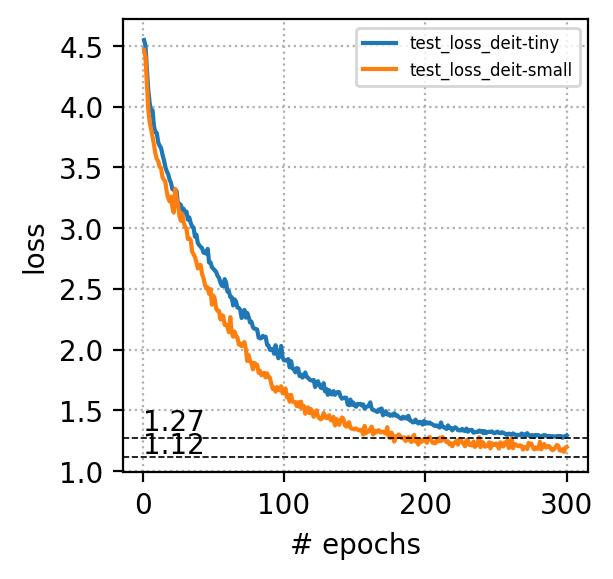

In [21]:
# plot loss
loss1 = np.min(dic1['test_loss'])
loss2 = np.min(dic2['test_loss'])
loss_str_1 = f'{loss1:.2f}'
loss_str_2 = f'{loss2:.2f}'

fig, ax = plt.subplots(figsize=(3,3), dpi=200)

ax.set(xlabel='# epochs', ylabel = 'loss')
ax.plot(range(1,301), dic1['test_loss'], label='test_loss_deit-tiny')
ax.plot(range(1,301), dic2['test_loss'][:300], label='test_loss_deit-small')
ax.axhline(y=loss1, color='k', linestyle='--', linewidth=0.6)
ax.axhline(y=loss2, color='k', linestyle='--', linewidth=0.6)
ax.annotate(loss_str_1,xy=(0,loss1+0.06))
ax.annotate(loss_str_2,xy=(0,loss2+0.03))
ax.grid(linestyle=':')
ax.legend(prop={'size': 6})
plt.show()

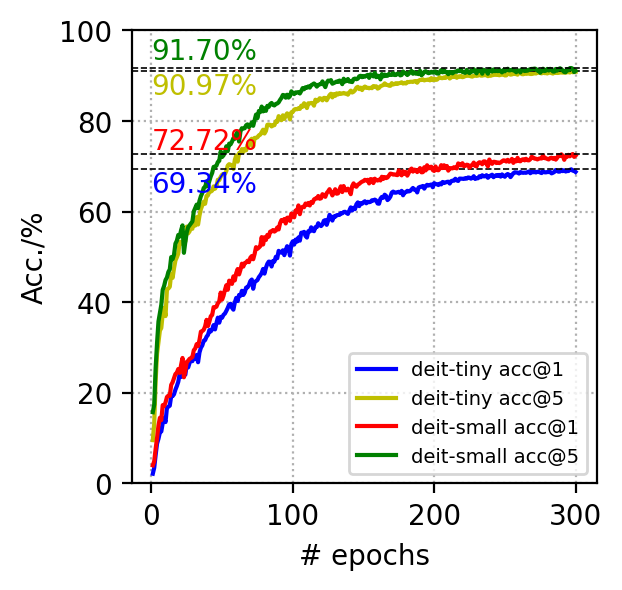

In [22]:
# plot log
fig, ax2 = plt.subplots(figsize=(3,3), dpi=200)
labels = ['deit-tiny acc@1', 'deit-tiny acc@5', 'deit-small acc@1', 'deit-small acc@5']
colors = ['b', 'y', 'r', 'g']
offsets = [-5,-5,1,2]
step = 0
for dic in [dic1, dic2]:
    acc1, acc5 = np.max(dic['test_acc1'][:300]), np.max(dic['test_acc5'][:300])
    acc1_str, acc5_str = f'{acc1:.2f}%', f'{acc5:.2f}%'
    ax2.set(ylim=(0, 100), xlabel='# epochs', ylabel = "Acc./%")
    ax2.plot(range(1,301), dic['test_acc1'][:300], label = labels[step], c=colors[step])
    ax2.plot(range(1,301), dic['test_acc5'][:300], label = labels[step+1], c=colors[step+1])
    ax2.axhline(y=acc1, color='k', linestyle='--', linewidth=0.6)
    ax2.axhline(y=acc5, color='k', linestyle='--', linewidth=0.6)
    ax2.annotate(acc1_str,xy=(0,acc1+offsets[step]), c=colors[step])
    ax2.annotate(acc5_str,xy=(0,acc5+offsets[step+1]), c = colors[step+1])
    step+=2
ax2.grid(linestyle=':')
ax2.legend(prop={'size': 7})
plt.show()